# Author - Anurag Vashisht
# Project - Predicting whether the Customer will Subscribe to the Term Deposit.
# Problem Statement - Given this information, the task is to predict if the client will subscribe to term deposit or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
train=pd.read_csv("BankTrain.csv")
test=pd.read_csv("BankTest.csv")

In [3]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [5]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [6]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [7]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

<Axes: >

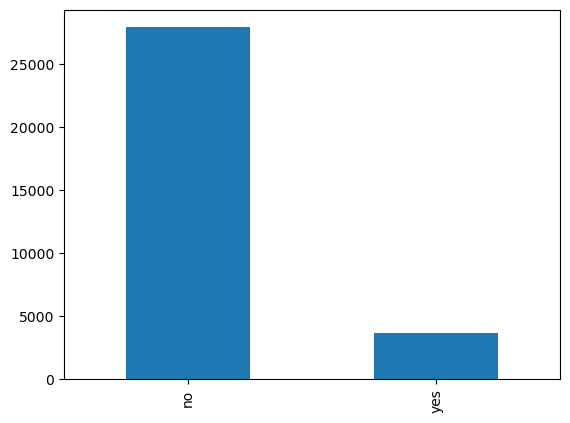

In [8]:
train["subscribed"].value_counts().plot.bar()

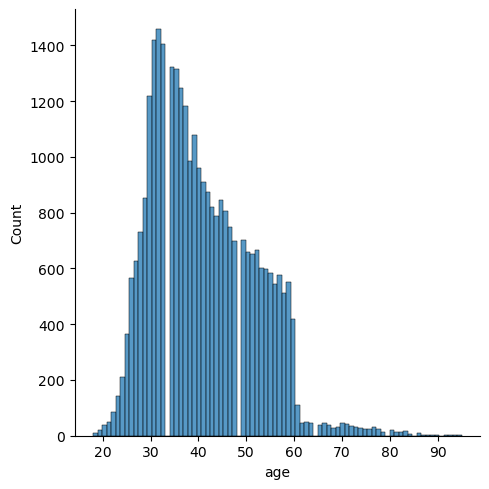

In [9]:
sn.displot(train["age"])

<Axes: >

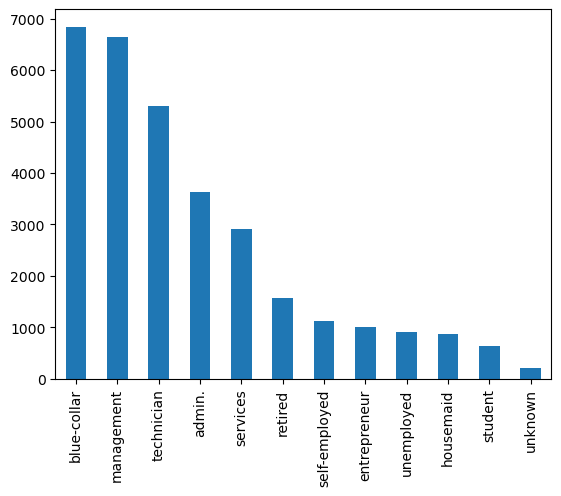

In [10]:
train["job"].value_counts().plot.bar()

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

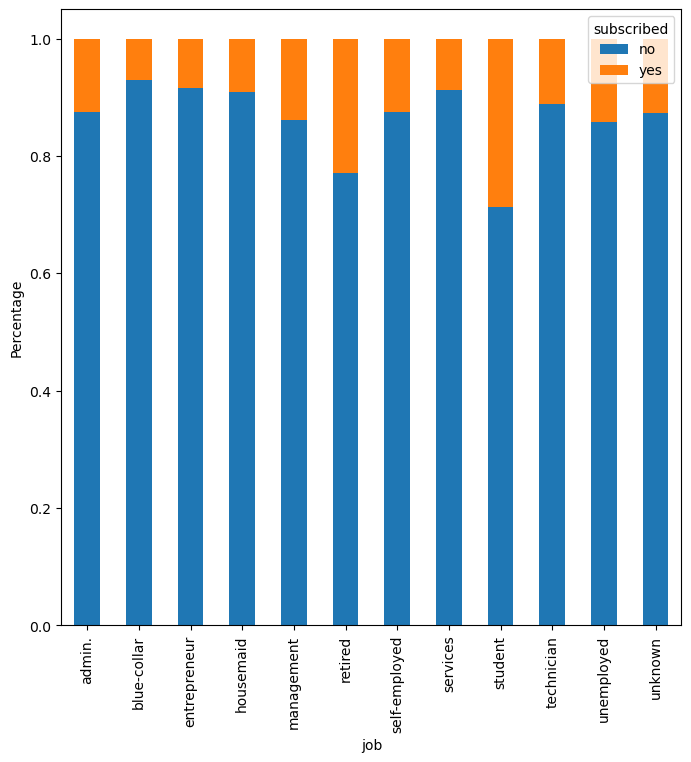

In [11]:
print(pd.crosstab(train['job'],train['subscribed']))
job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('job')
plt.ylabel('Percentage')

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

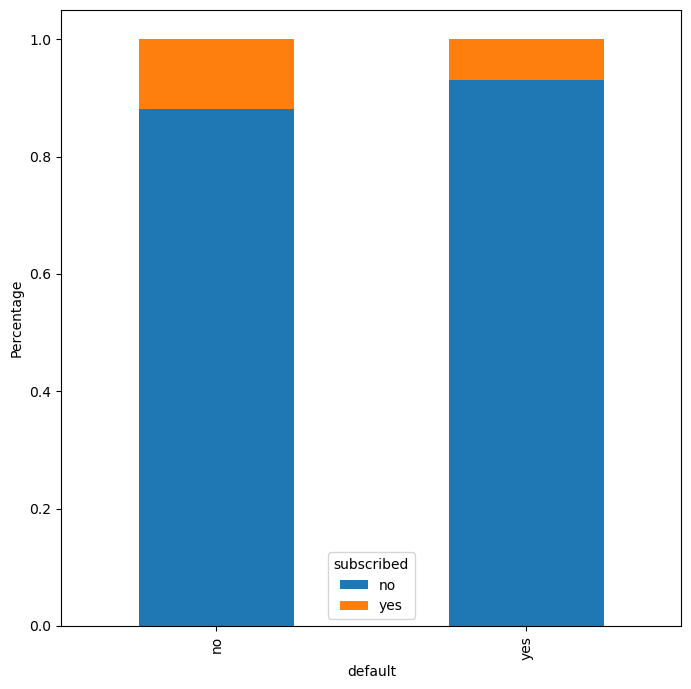

In [12]:
print(pd.crosstab(train['default'],train['subscribed']))
default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [13]:
train["subscribed"].replace("no",0,inplace=True)
train["subscribed"].replace("yes",1,inplace=True)

In [14]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


C:\Users\asus\AppData\Local\Temp\ipykernel_14912\3895164032.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

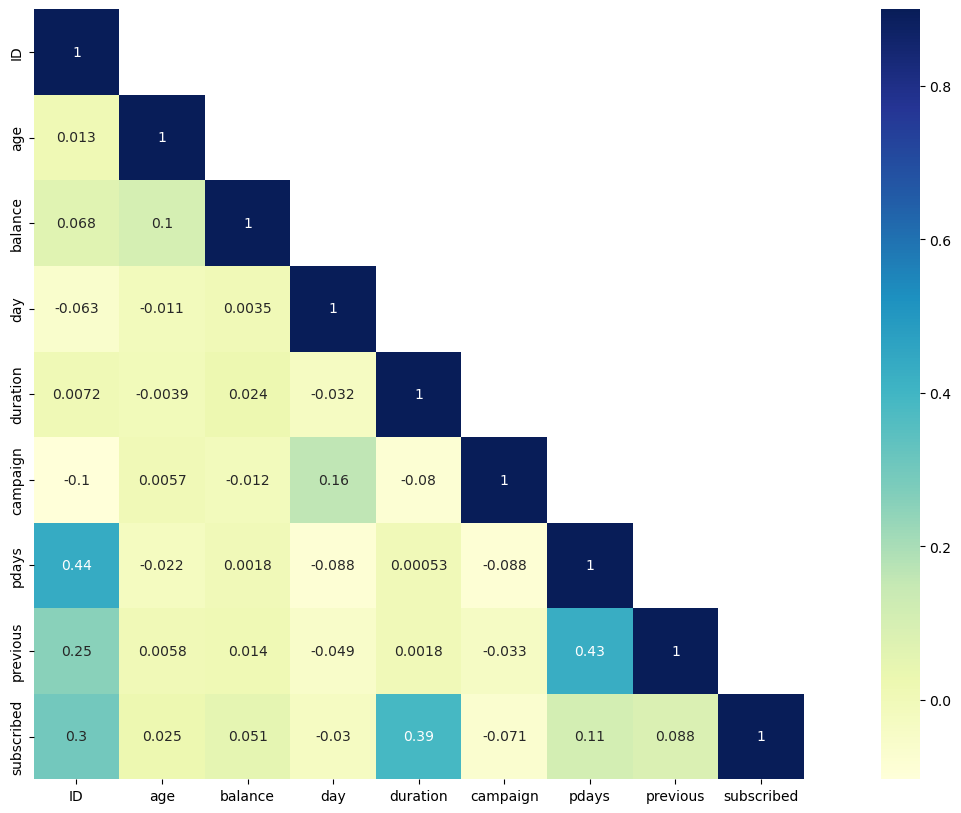

In [15]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [16]:
val=train["subscribed"]
train=train.drop("subscribed",axis=1)

In [17]:
train=pd.get_dummies(train)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_val,y_train,y_val=train_test_split(train, val, test_size = 0.2)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lreg=LogisticRegression()

In [22]:
lreg.fit(x_train,y_train)

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
x_train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
24838,11812,46,296,20,205,4,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
15845,14921,32,198,16,132,2,-1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
11781,42791,50,2366,28,816,2,149,1,0,0,...,0,0,0,0,0,0,0,1,0,0
22557,2706,40,1089,13,195,5,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5902,5083,34,1739,21,213,2,-1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [24]:
predict=lreg.predict(x_val)

In [25]:
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_val,predict)

0.8838862559241706

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
Dtree=DecisionTreeClassifier(max_depth=4,random_state=0)

In [29]:
Dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [30]:
pre=Dtree.predict(x_val)

In [31]:
pre

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [32]:
accuracy_score(y_val,pre)

0.9061611374407583

In [33]:
test=pd.get_dummies(test)

In [34]:
test_pred=Dtree.predict(test)

In [35]:
test_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [38]:
Submission=pd.DataFrame()

In [39]:
Submission["subscribed"]=test_pred

In [40]:
Submission['subscribed'].replace(0,'no',inplace=True)
Submission['subscribed'].replace(1,'yes',inplace=True)

In [42]:
Submission.to_csv('submission.csv', header=True, index=False)